In [1]:
import ROOT
import numpy as np
import pandas as pd
import xgboost as xgb
from array import array

Welcome to JupyROOT 6.24/02


/home/chenghan/.conda/envs/hdalitz2/lib/python3.8/site-packages/ROOT/_facade.py:150: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return _orig_ihook(name, *args, **kwds)
/home/chenghan/.conda/envs/hdalitz2/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
models = {
    "M2EB": xgb.Booster(),
    "M2EE": xgb.Booster()
}
models["M2EB"].load_model("/data4/chenghan/external/MergedID/Output_Merged2GsfID_hyperTune_FullRun2ULWPPtWeiFinal_EB/XGB/XGB_modelXGB.txt")
models["M2EE"].load_model("/data4/chenghan/external/MergedID/Output_Merged2GsfID_hyperTune_FullRun2ULWPPtWeiFinal_EE/XGB/XGB_modelXGB.txt")

In [3]:
from tools.dfUtils import df_load
from glob import glob

features = [
    "rho",
    "eleSCEta",
    "eleSCRawEn",

    "eledEtaAtVtx",
    "eledPhiAtVtx",
    "elePtError",
    "eleHoverE",
    "eleEoverP",
    "eleEoverPout",
    "eleEoverPInv",

    "eleSCEtaWidth",
    "eleSCPhiWidth",
    "eleSigmaIEtaIEtaFull5x5",
    "eleSigmaIPhiIPhiFull5x5",
    "eleR9Full5x5",
    "eleBrem",

    "elePFChIso",
    "elePFPhoIso",
    "elePFNeuIso",

    "gsfPtRatio",
    "gsfDeltaR",
    "gsfRelPtRatio"
]
sig_files = glob("./data/DataFrames-Merged-2Gsf-FullRun2UL-EB/*.parquet")
bkg_files = glob("./data/DataFrames-DYJets-FullRun2UL-*-EB/*.parquet") + glob("./data/DataFrames-QCD-FullRun2UL-EB/*.parquet")

# sig_files = glob("./data/DataFrames-Merged-2Gsf-FullRun2UL-EE/*.parquet")
# bkg_files = glob("./data/DataFrames-DYJets-FullRun2UL-*-EE/*.parquet") + glob("./data/DataFrames-QCD-FullRun2UL-EE/*.parquet")

sig_df = df_load(sig_files, columns=features+["mcwei", "eleCalibPt", "elePresel", "nGsfMatchToReco"], cuts="eleCalibPt > 25 and elePresel == 1 and nGsfMatchToReco >= 2", extral_text="signal")
bkg_df = df_load(bkg_files, columns=features+["mcwei", "eleCalibPt", "elePresel", "nGsfMatchToReco"], cuts="eleCalibPt > 25 and elePresel == 1 and nGsfMatchToReco >= 2", extral_text="background")

[INFO] Read files:
['./data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.4.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.5.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.8.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.0.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.19.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.15.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.7.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.1.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.11.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.13.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.12.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.6.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.16.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.2.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EB/part.10.parquet',
 './data/DataFrames-Merged-2G

In [4]:
y_sig = models["M2EB"].predict(xgb.DMatrix(sig_df.loc[:,features].values))
sig_df.insert(loc=0, column="eleClass", value=y_sig.argmax(axis=1))
sig_df.insert(loc=0, column="eleXGBID", value=y_sig[:,0])
sig_df

# y_sig = models["M2EE"].predict(xgb.DMatrix(sig_df.loc[:,features].values))
# sig_df.insert(loc=0, column="eleClass", value=y_sig.argmax(axis=1))
# sig_df.insert(loc=0, column="eleXGBID", value=y_sig[:,0])
# sig_df

,eleXGBID,eleClass,rho,eleSCEta,eleSCRawEn,eledEtaAtVtx,eledPhiAtVtx,elePtError,eleHoverE,eleEoverP,...,elePFChIso,elePFPhoIso,elePFNeuIso,gsfPtRatio,gsfDeltaR,gsfRelPtRatio,mcwei,eleCalibPt,elePresel,nGsfMatchToReco
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
3395024,0.824784,0,20.167061,-0.206409,66.669983,0.000650,0.013252,0.687120,0.000000,1.304444,...,0.000000,2.286442,0.000000,0.292295,0.007939,1.086984,0.000011,67.012833,1,2
3395025,0.794286,0,18.962856,0.945597,43.588066,0.002079,0.038244,1.085861,0.088466,1.354337,...,1.970217,0.794496,2.916565,0.303227,0.003644,0.737423,0.000011,31.467133,1,2
3395026,0.909814,0,15.777688,1.104859,75.750114,0.003911,-0.017873,1.004237,0.000000,1.513934,...,2.428194,0.677208,0.000000,0.128292,0.013489,0.661118,0.000011,50.695454,1,2
3395029,0.894984,0,13.497308,0.310680,171.107025,-0.000327,0.014381,1.628284,0.004572,2.190830,...,0.000000,0.445343,0.000000,0.525249,0.000670,0.696392,0.000011,161.429184,1,2
3395030,0.953567,0,12.772333,0.269856,50.425709,0.000284,-0.021927,1.642476,0.000000,1.576523,...,0.000000,0.370698,0.000000,0.278398,0.001054,0.907426,0.000011,49.445438,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487552,0.811972,0,14.094674,-0.261448,72.055550,-0.000897,0.013187,1.012383,0.000000,1.337312,...,0.000000,0.000000,0.000000,0.112500,0.012976,0.930690,0.000010,72.533676,1,2
8487553,0.957782,0,12.160046,0.043777,74.149605,0.000922,-0.016184,0.879916,0.000000,1.776994,...,3.959783,0.756464,0.000000,0.396305,0.000855,0.985078,0.000010,76.309380,1,2
8487554,0.272851,1,28.064133,-0.792559,95.628159,0.000352,0.002193,1.462571,0.000000,0.501425,...,0.402709,1.284593,0.000000,0.153938,0.017862,2.136807,0.000010,74.305962,1,2


In [5]:
y_bkg = models["M2EB"].predict(xgb.DMatrix(bkg_df.loc[:,features].values))
bkg_df.insert(loc=0, column="eleClass", value=y_bkg.argmax(axis=1))
bkg_df.insert(loc=0, column="eleXGBID", value=y_bkg[:,0])
bkg_df

,eleXGBID,eleClass,rho,eleSCEta,eleSCRawEn,eledEtaAtVtx,eledPhiAtVtx,elePtError,eleHoverE,eleEoverP,...,elePFChIso,elePFPhoIso,elePFNeuIso,gsfPtRatio,gsfDeltaR,gsfRelPtRatio,mcwei,eleCalibPt,elePresel,nGsfMatchToReco
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
1990887,0.179804,1,9.952969,-0.894147,59.188259,-0.000174,0.188970,1.461066,0.000000,13.143876,...,0.000000,0.000000,0.000000,1.444892,0.032646,0.155052,2.253202,44.790222,1,3
1990901,0.456205,1,22.395107,1.024451,84.241318,0.002397,-0.002519,3.858354,0.000000,0.817312,...,0.000000,1.061026,0.000000,0.047767,0.008915,1.087869,2.253202,65.828270,1,4
1990909,0.626059,0,5.428772,0.435697,43.721058,0.001201,0.007342,0.888017,0.000000,0.695459,...,4.425427,0.000000,0.000000,0.044447,0.025512,1.605166,2.253202,44.333897,1,2
1991003,0.443258,1,14.123709,-0.573681,55.351959,-0.001953,0.021364,0.924008,0.000000,2.020740,...,0.265016,0.741249,0.000000,0.185700,0.020063,0.542901,2.253202,49.604958,1,2
1991312,0.802887,0,16.465647,-0.074888,49.350750,0.000524,-0.025921,1.171295,0.015723,1.203299,...,0.000000,0.910378,0.000000,0.144203,0.019518,0.951643,2.253202,50.704044,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031294,0.000559,2,26.556618,1.250127,204.946808,0.000098,0.101465,11.121779,0.053266,11.803793,...,8.539616,12.754601,4.902281,0.556640,0.006154,0.080222,308.794233,117.429329,1,2
15031369,0.004170,2,31.843622,-0.720125,60.110268,-0.001851,-0.009373,2.462162,0.133223,1.168499,...,58.320904,12.710468,0.000000,0.371621,0.048120,1.011020,308.794233,47.628056,1,4
15031494,0.001179,2,17.284710,-0.412756,119.984962,-0.003677,-0.050077,7.911196,0.147745,6.790994,...,14.287682,9.389811,0.000000,0.298571,0.063056,0.252043,308.794233,50.176170,1,2


In [6]:
# np.arange(0.4, 1, 0.01)
# sig_df_opt = sig_df.query("eleClass == 0")
# bkg_df_opt = bkg_df.query("eleClass == 0")
sig_all = sig_df["mcwei"].sum()
bkg_all = bkg_df["mcwei"].sum()

ams = []
sig_eff = []
bkg_eff = []
xbin = np.arange(0.4, 0.9, 0.001)
for wp in xbin:
    s = sig_df.query("eleClass == 0 and eleXGBID > {}".format(wp))["mcwei"].sum()
    b = bkg_df.query("eleClass == 0 and eleXGBID > {}".format(wp))["mcwei"].sum()
    sig_eff.append(s/sig_all)
    bkg_eff.append(b/bkg_all)
    ams.append(s/ROOT.TMath.Sqrt(b))
    
print(xbin[np.argmax(ams)])
print(sig_eff)


0.8840000000000005
[0.88569766, 0.88568187, 0.88566196, 0.8856485, 0.8856311, 0.8856155, 0.88559955, 0.8855786, 0.88555706, 0.88553447, 0.8855098, 0.88549083, 0.8854685, 0.885446, 0.8854243, 0.8854024, 0.885381, 0.88536286, 0.8853418, 0.88532007, 0.8852967, 0.88526946, 0.8852459, 0.8852209, 0.885196, 0.8851726, 0.88514763, 0.88511795, 0.8850911, 0.88506776, 0.88504475, 0.88502103, 0.8849917, 0.8849609, 0.8849309, 0.8849052, 0.88486713, 0.8848341, 0.8848003, 0.88476753, 0.88472754, 0.88469064, 0.8846531, 0.88461405, 0.88457197, 0.8845338, 0.88448596, 0.8844488, 0.8844065, 0.88436717, 0.8843262, 0.88428134, 0.8842417, 0.8841931, 0.8841485, 0.88410455, 0.88405126, 0.8840019, 0.88394827, 0.8838957, 0.8838444, 0.8837971, 0.88374275, 0.88368857, 0.88363254, 0.88357455, 0.8835098, 0.88345236, 0.8833814, 0.88331795, 0.8832511, 0.88318944, 0.883118, 0.8830489, 0.88297206, 0.8829004, 0.88282424, 0.8827369, 0.8826542, 0.88257307, 0.8824827, 0.88239825, 0.8823004, 0.88221025, 0.8821115, 0.8820118,

0.8060000000000004
0.7091979


<Figure size 432x288 with 0 Axes>

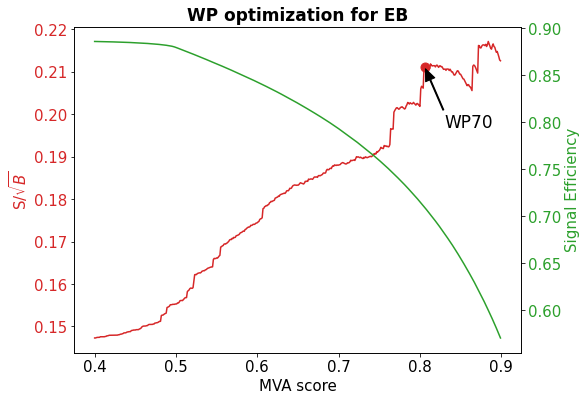

In [7]:
import matplotlib.pyplot as plt
plt.tight_layout()

color = "tab:red"
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.set_xlabel("MVA score", fontsize=15)
ax1.set_ylabel("S/$\sqrt{B}$", color=color, fontsize=15)
ax1.plot(xbin, ams, color=color)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelcolor=color, labelsize=15)

idx_71 = np.where(np.array(sig_eff) < 0.71)[0][0]
print(xbin[idx_71])
print(sig_eff[idx_71])
# ax1.scatter(xbin, ams, color="lightgreen", edgecolor="green") 
ax1.plot(xbin[idx_71], ams[idx_71], marker="o", color=color, markersize=9)
# ax1.plot([xbin[idx_71], xbin[idx_71]], [ams[idx_71], 0], 'k-.', lw=2.5)
plt.annotate("WP70", 
             xy=(xbin[idx_71], ams[idx_71]), 
             xycoords='data',
             xytext=(+20, -60),
             textcoords='offset points',
             fontsize=17,  
             arrowprops=dict(facecolor='black', shrink=0.03, width=1, headwidth=10)
            )


ax2 = ax1.twinx()
color = "tab:green"
ax2.set_ylabel("Signal Efficiency", color=color, fontsize=15)
ax2.plot(xbin, sig_eff, color=color)
ax2.tick_params(axis="y", labelcolor=color, labelsize=15)

# color = 'tab:red'
# ax1.set_xlabel('X-axis')
# ax1.set_ylabel('Y1-axis', color = color)
# ax1.plot(x, dataset_1, color = color)
# ax1.tick_params(axis ='y', labelcolor = color)
 
# # Adding Twin Axes to plot using dataset_2
# ax2 = ax1.twinx()
 
# color = 'tab:green'
# ax2.set_ylabel('Y2-axis', color = color)
# ax2.plot(x, dataset_2, color = color)
# ax2.tick_params(axis ='y', labelcolor = color)
 
# # Adding title
# plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold")




# plt.scatter(xbin, ams, color="lightgreen", edgecolor="green") 
# plt.ylabel("S/$\sqrt{B}$")
# plt.xlabel("MVA score")
plt.title("WP optimization for EB", fontweight ="bold", fontsize=17)
plt.savefig("WP_opt_EB.pdf")

In [8]:
sig_wei_den = np.asarray(sig_df["mcwei"], dtype=np.float64)
sig_pt_den = np.asarray(sig_df["eleCalibPt"].to_numpy(), dtype=np.float64)
h_sig_pt_den = ROOT.TH1F("h_sig_pt_den", "", 3, array("d", [25,35,50,150]))
h_sig_pt_den.FillN(len(sig_pt_den), sig_pt_den, sig_wei_den)

In [9]:
bkg_wei_den = np.asarray(bkg_df["mcwei"], dtype=np.float64)
bkg_pt_den = np.asarray(bkg_df["eleCalibPt"].to_numpy(), dtype=np.float64)
h_bkg_pt_den = ROOT.TH1F("h_bkg_pt_den", "", 3, array("d", [25,35,50,150]))
h_bkg_pt_den.FillN(len(bkg_pt_den), bkg_pt_den, bkg_wei_den)

In [10]:
sig_wei_num = np.asarray(sig_df.query("eleClass == 0 and eleXGBID > {}".format(xbin[idx_71]))["mcwei"], dtype=np.float64)
sig_pt_num = np.asarray(sig_df.query("eleClass == 0 and eleXGBID > {}".format(xbin[idx_71]))["eleCalibPt"].to_numpy(), dtype=np.float64)
h_sig_pt_num = ROOT.TH1F("h_sig_pt_num", "", 3, array("d", [25,35,50,150]))
h_sig_pt_num.FillN(len(sig_pt_num), sig_pt_num, sig_wei_num)

In [11]:
bkg_wei_num = np.asarray(bkg_df.query("eleClass == 0 and eleXGBID > {}".format(xbin[idx_71]))["mcwei"], dtype=np.float64)
bkg_pt_num = np.asarray(bkg_df.query("eleClass == 0 and eleXGBID > {}".format(xbin[idx_71]))["eleCalibPt"].to_numpy(), dtype=np.float64)
h_bkg_pt_num = ROOT.TH1F("h_bkg_pt_num", "", 3, array("d", [25,35,50,150]))
h_bkg_pt_num.FillN(len(bkg_pt_num), bkg_pt_num, bkg_wei_num)

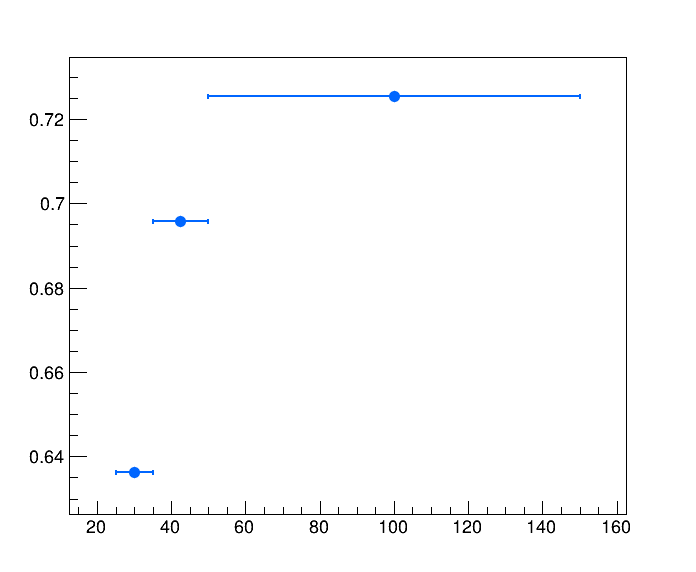

In [12]:
sig_err = ROOT.TGraphAsymmErrors(h_sig_pt_num, h_sig_pt_den, "cl=0.683 b(1,1) mode")

c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()
sig_err.SetMarkerColor(ROOT.kAzure-3)
sig_err.SetMarkerSize(1.4)
sig_err.SetMarkerStyle(20)
sig_err.SetLineColor(ROOT.kAzure-3)
sig_err.SetLineWidth(2)
sig_err.Draw("AP")
c1.Draw()

In [13]:
sig_files = glob("./data/DataFrames-Merged-2Gsf-FullRun2UL-EE/*.parquet")
bkg_files = glob("./data/DataFrames-DYJets-FullRun2UL-*-EE/*.parquet") + glob("./data/DataFrames-QCD-FullRun2UL-EE/*.parquet")

sig_df = df_load(sig_files, columns=features+["mcwei", "eleCalibPt", "elePresel", "nGsfMatchToReco"], cuts="eleCalibPt > 25 and elePresel == 1 and nGsfMatchToReco >= 2", extral_text="signal")
bkg_df = df_load(bkg_files, columns=features+["mcwei", "eleCalibPt", "elePresel", "nGsfMatchToReco"], cuts="eleCalibPt > 25 and elePresel == 1 and nGsfMatchToReco >= 2", extral_text="background")

[INFO] Read files:
['./data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.4.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.5.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.8.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.0.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.19.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.15.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.7.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.1.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.11.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.13.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.12.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.6.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.16.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.2.parquet',
 './data/DataFrames-Merged-2Gsf-FullRun2UL-EE/part.10.parquet',
 './data/DataFrames-Merged-2G

In [14]:
y_sig = models["M2EE"].predict(xgb.DMatrix(sig_df.loc[:,features].values))
sig_df.insert(loc=0, column="eleClass", value=y_sig.argmax(axis=1))
sig_df.insert(loc=0, column="eleXGBID", value=y_sig[:,0])
sig_df

,eleXGBID,eleClass,rho,eleSCEta,eleSCRawEn,eledEtaAtVtx,eledPhiAtVtx,elePtError,eleHoverE,eleEoverP,...,elePFChIso,elePFPhoIso,elePFNeuIso,gsfPtRatio,gsfDeltaR,gsfRelPtRatio,mcwei,eleCalibPt,elePresel,nGsfMatchToReco
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
3395027,0.576458,0,9.619094,2.292179,189.318253,0.005601,-0.008382,1.367808,0.018858,0.978664,...,0.000000,0.249278,0.000000,0.919152,0.034034,0.596606,0.000011,43.470554,1,4
3395028,0.961369,0,8.593976,1.903373,137.871628,0.000347,0.029764,1.133821,0.000000,2.087037,...,0.000000,0.289718,0.000000,0.656670,0.003003,0.287057,0.000011,44.628189,1,2
3395032,0.624534,0,7.580955,-2.239488,210.726303,-0.004410,0.007967,1.256152,0.000000,1.437354,...,0.000000,0.000000,0.000000,1.884711,0.010821,0.883161,0.000011,54.054958,1,6
3395035,0.644651,0,15.450415,-2.101310,112.124123,-0.004959,-0.008866,1.240536,0.010055,1.480024,...,0.000000,0.000000,0.000000,0.055928,0.011333,0.872621,0.000011,34.522259,1,2
3395037,0.343956,1,21.548540,-2.324367,199.962067,-0.002271,-0.046924,1.136681,0.010799,10.088828,...,0.000000,1.821240,0.000000,3.508412,0.031901,0.124884,0.000011,44.578861,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487521,0.039451,1,25.521852,1.619165,183.187714,0.002023,-0.001578,1.550289,0.000000,1.035963,...,0.000000,0.298026,0.000000,0.000000,2.757952,0.493756,0.000010,72.402283,1,2
8487526,0.835118,0,15.102493,1.884433,282.291138,0.002941,0.008268,1.666860,0.000000,2.046979,...,0.000000,0.378081,0.540898,0.230650,0.003197,0.313198,0.000010,97.118050,1,4
8487527,0.940890,0,13.520082,-1.832532,141.744904,-0.002438,-0.031844,1.375372,0.011118,1.898295,...,0.000000,0.000000,2.366187,0.750616,0.003453,0.423639,0.000010,53.883980,1,2


In [15]:
y_bkg = models["M2EE"].predict(xgb.DMatrix(bkg_df.loc[:,features].values))
bkg_df.insert(loc=0, column="eleClass", value=y_bkg.argmax(axis=1))
bkg_df.insert(loc=0, column="eleXGBID", value=y_bkg[:,0])
bkg_df

,eleXGBID,eleClass,rho,eleSCEta,eleSCRawEn,eledEtaAtVtx,eledPhiAtVtx,elePtError,eleHoverE,eleEoverP,...,elePFChIso,elePFPhoIso,elePFNeuIso,gsfPtRatio,gsfDeltaR,gsfRelPtRatio,mcwei,eleCalibPt,elePresel,nGsfMatchToReco
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
4943374,0.178673,1,15.134040,-1.866662,176.344208,-0.000147,-0.003387,1.111362,0.005848,1.090541,...,2.635052,0.263541,0.236041,0.000000,1.867060,0.355470,3.338202,57.375809,1,2
4943400,0.251671,1,14.250558,-2.451948,222.765457,-0.001902,-0.003451,1.552951,0.034077,0.245615,...,0.126103,0.536051,1.219869,0.024761,0.039564,0.957839,3.338202,44.322102,1,2
4943410,0.481967,1,32.965897,-1.942903,250.195724,-0.004692,-0.003693,1.559930,0.003321,1.049878,...,0.000000,0.000000,1.923148,0.058423,0.018891,0.349151,3.338202,77.637726,1,2
4943448,0.063886,1,27.401749,-2.089740,107.114548,0.001559,0.002430,0.872970,0.073823,1.218097,...,0.000000,0.232479,1.505001,0.013044,0.245660,0.270404,3.338202,29.684990,1,2
4943453,0.044271,1,38.584892,-1.974751,272.487183,0.000744,-0.002955,1.446925,0.022508,1.403674,...,0.000000,0.361540,0.000000,0.027047,0.106356,0.233392,3.338202,79.465172,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031367,0.002410,2,26.085369,-1.979660,241.541183,-0.010530,-0.029287,3.482469,0.135490,12.646042,...,13.259549,2.898063,0.000000,0.000000,3.328695,0.030687,308.794233,71.569984,1,2
15031379,0.475816,2,16.158356,2.276587,178.571533,-0.003978,-0.028307,1.915671,0.077492,2.550699,...,6.243320,0.000000,0.000000,1.939893,0.003554,0.274545,308.794233,38.901096,1,2
15031398,0.264667,2,29.320953,-2.223081,477.358276,-0.008687,0.000730,5.208220,0.015797,1.301208,...,10.934184,0.458610,0.595649,0.006243,0.576617,0.232189,308.794233,103.257202,1,2


In [16]:
# np.arange(0.4, 1, 0.01)
# sig_df_opt = sig_df.query("eleClass == 0")
# bkg_df_opt = bkg_df.query("eleClass == 0")
sig_all = sig_df["mcwei"].sum()
bkg_all = bkg_df["mcwei"].sum()

ams = []
sig_eff = []
bkg_eff = []
xbin = np.arange(0.4, 0.9, 0.001)
for wp in xbin:
    s = sig_df.query("eleClass == 0 and eleXGBID > {}".format(wp))["mcwei"].sum()
    b = bkg_df.query("eleClass == 0 and eleXGBID > {}".format(wp))["mcwei"].sum()
    sig_eff.append(s/sig_all)
    bkg_eff.append(b/bkg_all)
    ams.append(s/ROOT.TMath.Sqrt(b))
    
print(xbin[np.argmax(ams)])
print(sig_eff)


0.8970000000000005
[0.7535033, 0.7534509, 0.75337905, 0.75332737, 0.75325954, 0.7532039, 0.7531368, 0.7530788, 0.75301397, 0.75295585, 0.75286436, 0.7527968, 0.75272566, 0.75265896, 0.7525705, 0.752504, 0.7524422, 0.7523645, 0.75226957, 0.75216883, 0.75208414, 0.75200534, 0.75191885, 0.7518393, 0.75172853, 0.7516393, 0.7515394, 0.75145143, 0.75135314, 0.7512398, 0.7511383, 0.75103486, 0.7509605, 0.7508543, 0.75074685, 0.750645, 0.7505452, 0.75043404, 0.7503243, 0.7502099, 0.7501066, 0.74999523, 0.74987614, 0.7497632, 0.7496546, 0.7495248, 0.74938434, 0.74925524, 0.749133, 0.74901235, 0.74887407, 0.74872094, 0.74856144, 0.74841046, 0.7482524, 0.7481206, 0.74794304, 0.74777776, 0.74761856, 0.74745804, 0.7472784, 0.74711317, 0.7469358, 0.746754, 0.7465671, 0.74638903, 0.7461657, 0.74594814, 0.7457154, 0.74550766, 0.745304, 0.7450991, 0.7448693, 0.74465203, 0.74442166, 0.74416524, 0.74391127, 0.74365425, 0.7434077, 0.7431522, 0.7428761, 0.7425768, 0.74228764, 0.74202746, 0.7417245, 0.74138

0.7180000000000003
0.54742146


<Figure size 432x288 with 0 Axes>

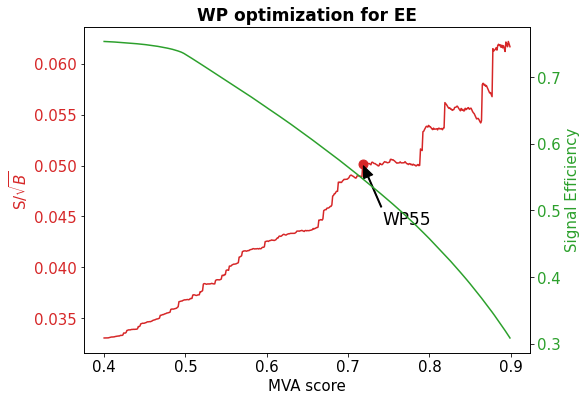

In [28]:
plt.tight_layout()

color = "tab:red"
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.set_xlabel("MVA score", fontsize=15)
ax1.set_ylabel("S/$\sqrt{B}$", color=color, fontsize=15)
ax1.plot(xbin, ams, color=color)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelcolor=color, labelsize=15)

idx_55 = np.where(np.array(sig_eff) < 0.548)[0][0]
print(xbin[idx_55])
print(sig_eff[idx_55])
# ax1.scatter(xbin, ams, color="lightgreen", edgecolor="green") 
ax1.plot(xbin[idx_55], ams[idx_55], marker="o", color=color, markersize=9)
# ax1.plot([xbin[idx_55], xbin[idx_55]], [ams[idx_55], 0], 'k-.', lw=2.5)
plt.annotate("WP55", 
             xy=(xbin[idx_55], ams[idx_55]), 
             xycoords='data',
             xytext=(+20, -60),
             textcoords='offset points',
             fontsize=17,  
             arrowprops=dict(facecolor='black', shrink=0.03, width=1, headwidth=10)
            )


ax2 = ax1.twinx()
color = "tab:green"
ax2.set_ylabel("Signal Efficiency", color=color, fontsize=15)
ax2.plot(xbin, sig_eff, color=color)
ax2.tick_params(axis="y", labelcolor=color, labelsize=15)

# color = 'tab:red'
# ax1.set_xlabel('X-axis')
# ax1.set_ylabel('Y1-axis', color = color)
# ax1.plot(x, dataset_1, color = color)
# ax1.tick_params(axis ='y', labelcolor = color)
 
# # Adding Twin Axes to plot using dataset_2
# ax2 = ax1.twinx()
plt.title("WP optimization for EE", fontweight ="bold", fontsize=17)
plt.savefig("WP_opt_EE.pdf")